Copyright 2019 The TensorFlow Authors.

Copyright 2020 The creApple Authors.




In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math

print(tf.__version__)

2.4.1


In [3]:
# Define Constants
batch_size = 128
epochs = 100
num_classes = 10

In [5]:
# Download MNIST dataset.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
len(train_images), len(test_images)

(60000, 10000)

In [7]:
# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [29]:
# Define the model architecture with CNN
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         # Hidden Layers 
                         # keras.layers.Dense(128, activation=tf.nn.relu),
                         keras.layers.Reshape(target_shape=(28, 28, 1)),
                         keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
                         keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
                         keras.layers.MaxPooling2D(pool_size=(2, 2)),
                         keras.layers.Dropout(0.25),
                         keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation=tf.nn.relu),
                         keras.layers.Dropout(0.5),

                         keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels),
                    epochs=epochs, batch_size=batch_size)

Epoch 1/100
469/469 [==============================] - 9s 8ms/step - loss: 0.4695 - accuracy: 0.8510 - val_loss: 0.0533 - val_accuracy: 0.9837
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0932 - accuracy: 0.9711 - val_loss: 0.0391 - val_accuracy: 0.9866
Epoch 3/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0628 - accuracy: 0.9795 - val_loss: 0.0360 - val_accuracy: 0.9877
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0523 - accuracy: 0.9847 - val_loss: 0.0311 - val_accuracy: 0.9892
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0327 - val_accuracy: 0.9894
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.0284 - val_accuracy: 0.9907
Epoch 7/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.0268 - val_accuracy: 0.9909

In [31]:
# Evaluate the model using test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.9943
Test Accuracy:  0.9943000078201294


In [11]:
# Helper function to display digit images
def show_sample(images, labels, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

# Helper function to display specific digit images
def show_sample_digit(images, labels, digit, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  i = 0
  digit_count = 0
  while digit_count < sample_count:
    i += 1
    if (digit == labels[i]):
      plt.subplot(grid_count, grid_count, digit_count+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      plt.xlabel(labels[i])
      digit_count += 1
  plt.show()

# Helper function to display specific digit images
def show_digit_image(image):
  # Draw digit image
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  # Major ticks every 20, minor ticks every 5
  major_ticks = np.arange(0, 29, 5)
  minor_ticks = np.arange(0, 29, 1)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  # And a corresponding grid
  ax.grid(which='both')
  # Or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)
  ax.imshow(image, cmap=plt.cm.binary)

  plt.show()

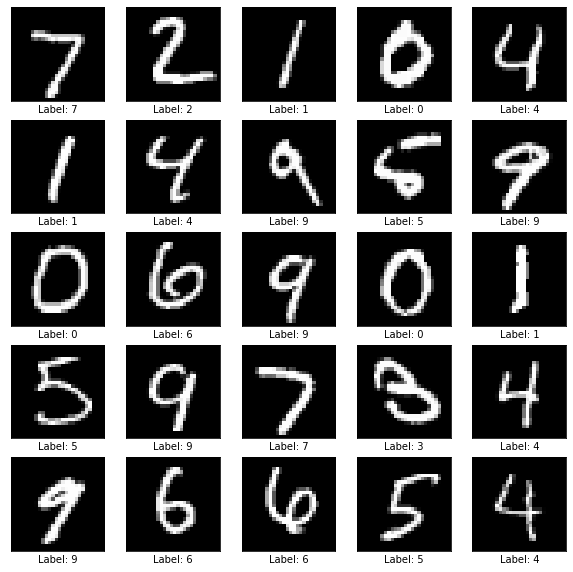

In [12]:
# Show the first 25 images in the training dataset.
show_sample(test_images, ['Label: %s' % label for label in test_labels])

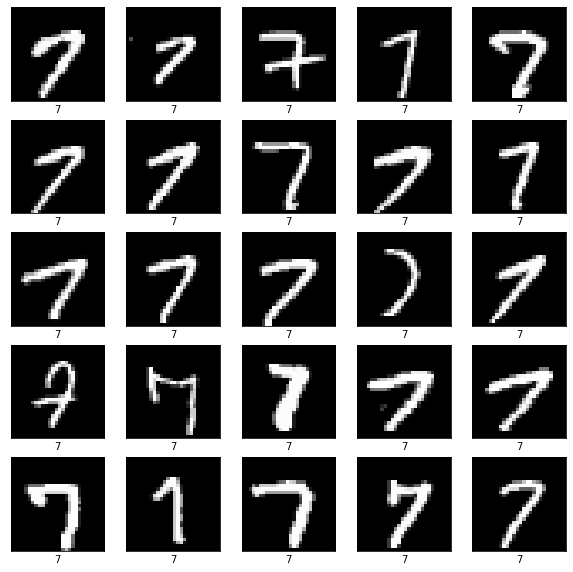

In [17]:
# Show digit 7 the first 25 images in the training dataset.
show_sample_digit(train_images, train_labels, 7)

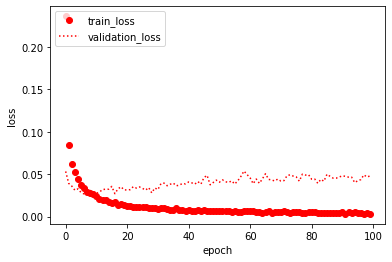

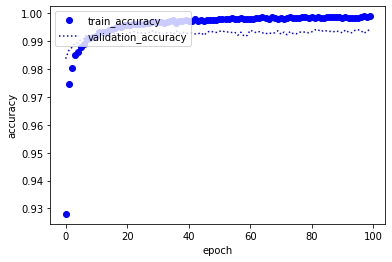

In [33]:
# Evaluate the model using test dataset. - Show performance

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label='train_loss')
loss_ax.plot(history.history['val_loss'], 'r:', label='validation_loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label='train_accuracy')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='validation_accuracy')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')

acc_ax.legend(loc='upper left')

plt.show()

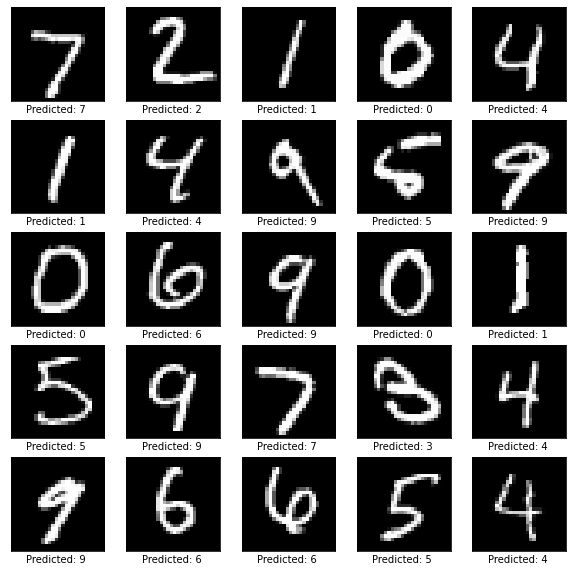

In [22]:
# Predict the labels of digit images in our test dataset.
predictions = model.predict(test_images)

# Then plot the first 25 test images and their predicted labels.
show_sample(test_images, ['Predicted: %d ' % np.argmax(result) for result in predictions])

Number is  2


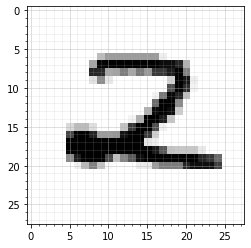

In [24]:
Digit = 8226 #@param {type:"slider", min:1, max:10000, step:1}
selected_digit = Digit - 1

result = predictions[selected_digit]
result_number = np.argmax(result)
print('Number is %2d' % result_number)

show_digit_image(test_images[selected_digit])